In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
# loading EnOI data

ds_cci_sst = xr.open_dataset('../Data/hycom_cci_sst.nc')
ds_cci_sst = ds_cci_sst.sel(time=slice('2009-03-04','2014-05-29'))

ds_cci_ssh = xr.open_dataset('../Data/hycom_cci_ssh.nc')
ds_cci_ssh = ds_cci_ssh.sel(time=slice('2009-03-04','2014-05-29'))

# loading HYCOMfree SST data

ds_free_sst = xr.open_dataset('../Data/hycom_free_sst.nc')
ds_free_sst = ds_free_sst.sel(time=slice('2009-03-04','2014-05-29'))

In [4]:
# selecting all assimilation days

day0_sst = ds_cci_sst['temperature'][1::7]
day0_ssh = ds_cci_ssh['ssh'][1::7]
day0_sst_free = ds_free_sst['temperature'][1::7]

# selecting all day 6's

day6_sst = ds_cci_sst['temperature'][0::7]
day6_ssh = ds_cci_ssh['ssh'][0::7]
day6_sst_free = ds_free_sst['temperature'][0::7]

In [5]:
# diff = day0 - day6

diff_sst = day0_sst.mean(dim='time') - day6_sst.mean(dim='time')
diff_ssh = day0_ssh.mean(dim='time') - day6_ssh.mean(dim='time')

# diff = day6 - day6 & day0 - day0

diff_sst_freecci_d6 = day6_sst.mean(dim='time') - day6_sst_free.mean(dim='time')
diff_sst_freecci_d0 = day0_sst.mean(dim='time') - day0_sst_free.mean(dim='time')

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# 1. Mean differences between HYCOM<sub>CCI</sub> day 0 and day 6

## 1.1 SST

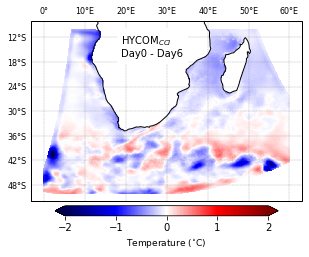

<Figure size 432x288 with 0 Axes>

In [26]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-2, vmax=2)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.80,'HYCOM$_{CCI}$\nDay0 - Day6', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SST_meandiff_all.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## 1.2 SSH

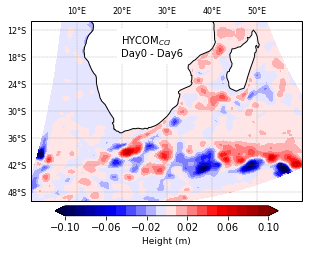

<Figure size 432x288 with 0 Axes>

In [45]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_cci_ssh['longitude'],ds_cci_ssh['latitude'])
cbarticks=np.arange(-0.1,0.11,0.010)

img = ax.contourf(x,y,diff_ssh, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::4], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.33,0.80,'HYCOM$_{CCI}$\nDay0 - Day6', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SSH_meandiff_all.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## 1.3 SSH: Current core contour

In [6]:
# select day 6 SSH contours
d6_cont = day6_ssh.sel(latitude=(-31.05),longitude=(30.66),method='nearest').mean(dim=('time'), skipna=True)
d6_cont_max = day6_ssh.sel(latitude=(-31.05),longitude=(30.66),method='nearest').max(dim=('time'), skipna=True)
d6_cont_min = day6_ssh.sel(latitude=(-31.05),longitude=(30.66),method='nearest').min(dim=('time'), skipna=True)

# select day 0 SSH contours
d0_cont = day0_ssh.sel(latitude=(-31.05),longitude=(30.66),method='nearest').mean(dim=('time'), skipna=True)
d0_cont_max = day0_ssh.sel(latitude=(-31.05),longitude=(30.66),method='nearest').max(dim=('time'), skipna=True)
d0_cont_min = day0_ssh.sel(latitude=(-31.05),longitude=(30.66),method='nearest').min(dim=('time'), skipna=True)

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/harry/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


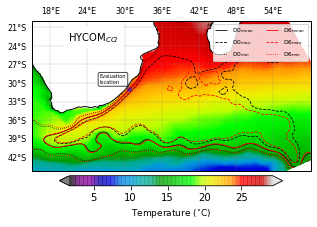

<Figure size 432x288 with 0 Axes>

In [7]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((15, 60, -42, -20))

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# plotting background field (img) and contours (img#)
x,y = np.meshgrid(ds_cci_ssh['longitude'],ds_cci_ssh['latitude'])

img = day6_sst.mean('time')[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, alpha=0.5)
img2 = ax.contour(x,y,day0_ssh.mean('time'), levels=[d0_cont], transform=ccrs.PlateCarree(), colors='black', linestyles='-', linewidths=0.8, add_colorbar=False, extend='both')
img3 = ax.contour(x,y,day0_ssh.mean('time'), levels=[d0_cont_max], transform=ccrs.PlateCarree(), colors='black', linestyles='dashed', linewidths=0.8, add_colorbar=False, extend='both')
img4 = ax.contour(x,y,day0_ssh.mean('time'), levels=[d0_cont_min], transform=ccrs.PlateCarree(), colors='black', linestyles='dotted', linewidths=0.8, add_colorbar=False, extend='both')
img5 = ax.contour(x,y,day6_ssh.mean('time'), levels=[d6_cont], transform=ccrs.PlateCarree(), colors='r', linestyles='-', linewidths=0.8, add_colorbar=False, extend='both')
img6 = ax.contour(x,y,day6_ssh.mean('time'), levels=[d6_cont_max], transform=ccrs.PlateCarree(), colors='r', linestyles='dashed', linewidths=0.8, add_colorbar=False, extend='both')
img7 = ax.contour(x,y,day6_ssh.mean('time'), levels=[d6_cont_min], transform=ccrs.PlateCarree(), colors='r', linestyles='dotted', linewidths=0.8, add_colorbar=False, extend='both')

# plotting location at which SSH was evaluated
evalu = ax.plot(30.66, -31.05, color='blue', marker='o', markersize=4, transform=ccrs.PlateCarree(), alpha=0.4)
ax.text(25.99, -30.13, 'Evaluation\nlocation', transform=ccrs.PlateCarree(), fontsize=5, bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

# colorbar work and providing blank title
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')

# chicanery to get legend to work
# source: https://stackoverflow.com/questions/16466674/matplotlib-multiple-legends-for-contour-plot-for-multiple-contour-variables
lines = [img2.collections[0], img3.collections[0], img4.collections[0], img5.collections[0], img6.collections[0], img7.collections[0]]
labels = ['D0$_{mean}$','D0$_{max}$','D0$_{min}$','D6$_{mean}$','D6$_{max}$','D6$_{min}$']
plt.legend(lines, labels, ncol=2, fontsize=6)

plt.text(0.13,0.87,'HYCOM$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SSH_fronts_all.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## 1.4 SST: Current core contours

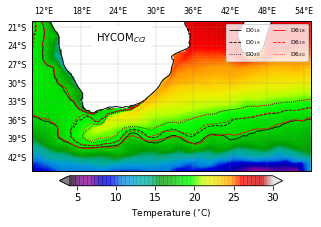

<Figure size 432x288 with 0 Axes>

In [159]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent((10, 55, -42, -20))

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# plotting background field (img) and contours (img#)
x,y = np.meshgrid(ds_cci_ssh['longitude'],ds_cci_ssh['latitude'])

img = day6_sst.mean('time')[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), add_colorbar=False, alpha=0.5, vmin=4, vmax=30)
img2 = ax.contour(x,y,day0_sst.mean('time')[0,:,:], levels=[18], transform=ccrs.PlateCarree(), colors='black', linestyles='-', linewidths=0.8, add_colorbar=False, extend='both')
img3 = ax.contour(x,y,day0_sst.mean('time')[0,:,:], levels=[19], transform=ccrs.PlateCarree(), colors='black', linestyles='dashed', linewidths=0.8, add_colorbar=False, extend='both')
img4 = ax.contour(x,y,day0_sst.mean('time')[0,:,:], levels=[20], transform=ccrs.PlateCarree(), colors='black', linestyles='dotted', linewidths=0.8, add_colorbar=False, extend='both')
img5 = ax.contour(x,y,day6_sst.mean('time')[0,:,:], levels=[18], transform=ccrs.PlateCarree(), colors='r', linestyles='-', linewidths=0.8, add_colorbar=False, extend='both')
img6 = ax.contour(x,y,day6_sst.mean('time')[0,:,:], levels=[19], transform=ccrs.PlateCarree(), colors='r', linestyles='dashed', linewidths=0.8, add_colorbar=False, extend='both')
img7 = ax.contour(x,y,day6_sst.mean('time')[0,:,:], levels=[20], transform=ccrs.PlateCarree(), colors='r', linestyles='dotted', linewidths=0.8, add_colorbar=False, extend='both')

# colorbar work and providing blank title
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')

# chicanery to get legend to work
# source: https://stackoverflow.com/questions/16466674/matplotlib-multiple-legends-for-contour-plot-for-multiple-contour-variables
lines = [img2.collections[0], img3.collections[0], img4.collections[0], img5.collections[0], img6.collections[0], img7.collections[0]]
labels = ['D0$_{18}$','D0$_{19}$','D0$_{20}$','D6$_{18}$','D6$_{19}$','D6$_{20}$']
plt.legend(lines, labels, ncol=2, fontsize=6)

plt.text(0.23,0.87,'HYCOM$_{CCI}$', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SST_fronts_all.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

# =========================================

# 2. Mean SST differences between day 6 and day 0 for HYCOM<sub>CCI</sub> and HYCOM<sub>FREE</sub>

## 2.1 Day 6

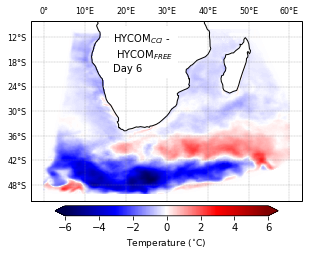

<Figure size 432x288 with 0 Axes>

In [16]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff_sst_freecci_d6.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-6, vmax=6)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.72,'HYCOM$_{CCI}$ -\n HYCOM$_{FREE}$\nDay 6', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SST_meandiff_HYCOMcciHYCOMfree_all_day6.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## 2.1 Day 0

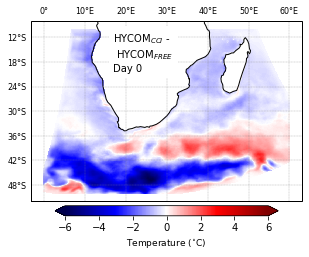

<Figure size 432x288 with 0 Axes>

In [24]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff_sst_freecci_d0.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-6, vmax=6)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.72,'HYCOM$_{CCI}$ -\n HYCOM$_{FREE}$\nDay 0', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SST_meandiff_HYCOMcciHYCOMfree_all_day0.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

# 3. Mean SST & SSH differences between HYCOM<sub>CCI</sub> for first and last assimilation days

## _Get the first and last assimilation dates and their differences_

In [27]:
# getting single differences for first and last assimilation steps

diff_first_sst = day0_sst[0] - day6_sst[0]
diff_first_ssh = day0_ssh[0] - day6_ssh[0]

diff_last_sst = day0_sst[-1] - day6_sst[-1]
diff_last_ssh = day0_ssh[-1] - day6_ssh[-1]

## 3.1 First assimilation date

### 3.1.1 SST

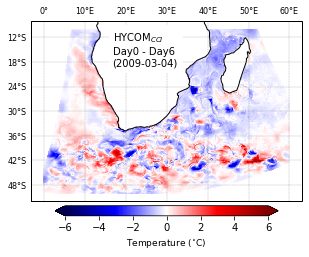

<Figure size 432x288 with 0 Axes>

In [40]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff_first_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-6, vmax=6)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.75,'HYCOM$_{CCI}$\nDay0 - Day6\n(2009-03-04)', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SST_diff_first.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### 3.1.2 SSH

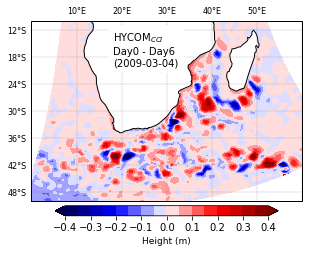

<Figure size 432x288 with 0 Axes>

In [43]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_cci_ssh['longitude'],ds_cci_ssh['latitude'])
cbarticks=np.arange(-0.4,0.45,0.05)

img = ax.contourf(x,y,diff_first_ssh, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.75,'HYCOM$_{CCI}$\nDay0 - Day6\n(2009-03-04)', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SSH_diff_first.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

## 3.2 Last assimilation date

### 3.2.1 SST

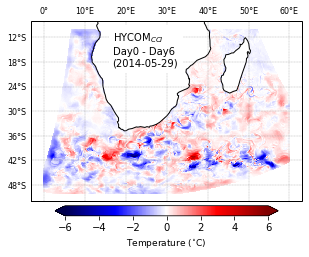

<Figure size 432x288 with 0 Axes>

In [39]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

img = diff_last_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-6, vmax=6)
cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.75,'HYCOM$_{CCI}$\nDay0 - Day6\n(2014-05-29)', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SST_diff_last.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

### 3.2.2 SSH

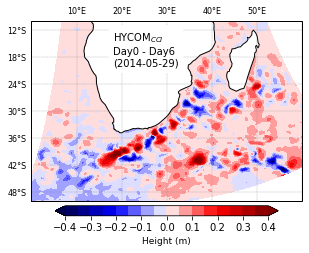

<Figure size 432x288 with 0 Axes>

In [44]:
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,4))
ax = plt.axes(projection=proj)
ax.coastlines()

# gridline work
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

x,y = np.meshgrid(ds_cci_ssh['longitude'],ds_cci_ssh['latitude'])
cbarticks=np.arange(-0.4,0.45,0.05)

img = ax.contourf(x,y,diff_last_ssh, cbarticks, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, extend='both')
cbar = plt.colorbar(img, ticks=cbarticks[::2], shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
cbar.set_label('Height (m)', fontsize=9)
ax.set_title('')
plt.text(0.30,0.75,'HYCOM$_{CCI}$\nDay0 - Day6\n(2014-05-29)', bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
plt.savefig('../Figures/day0_vs_day6/SSH_diff_last.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()